In [27]:
from utils.draw import draw_custom_weighted_graph
from ga.tsp_ga_din_crossover import TSPGA as GA_P
import numpy as np

In [28]:
import json
def write_dict_to_file(filename, dictionary):
    with open(filename, 'w') as file:
        json.dump(dictionary, file, indent=4)

def load_dict_from_file(filename):
    with open(filename, 'r') as file:
        dictionary = json.load(file)
    return dictionary

In [29]:
from itertools import permutations
import random
from tqdm import tqdm
def generate_network(num_nodes, rand_a, rand_b):
    nodes_list = [x for x in range(num_nodes)]
    edges = list(permutations(nodes_list, 2))
    edges_w = [(*x, random.randint(rand_a,rand_b)) for x in edges]

    return nodes_list, edges_w

# Testing 8 nodes

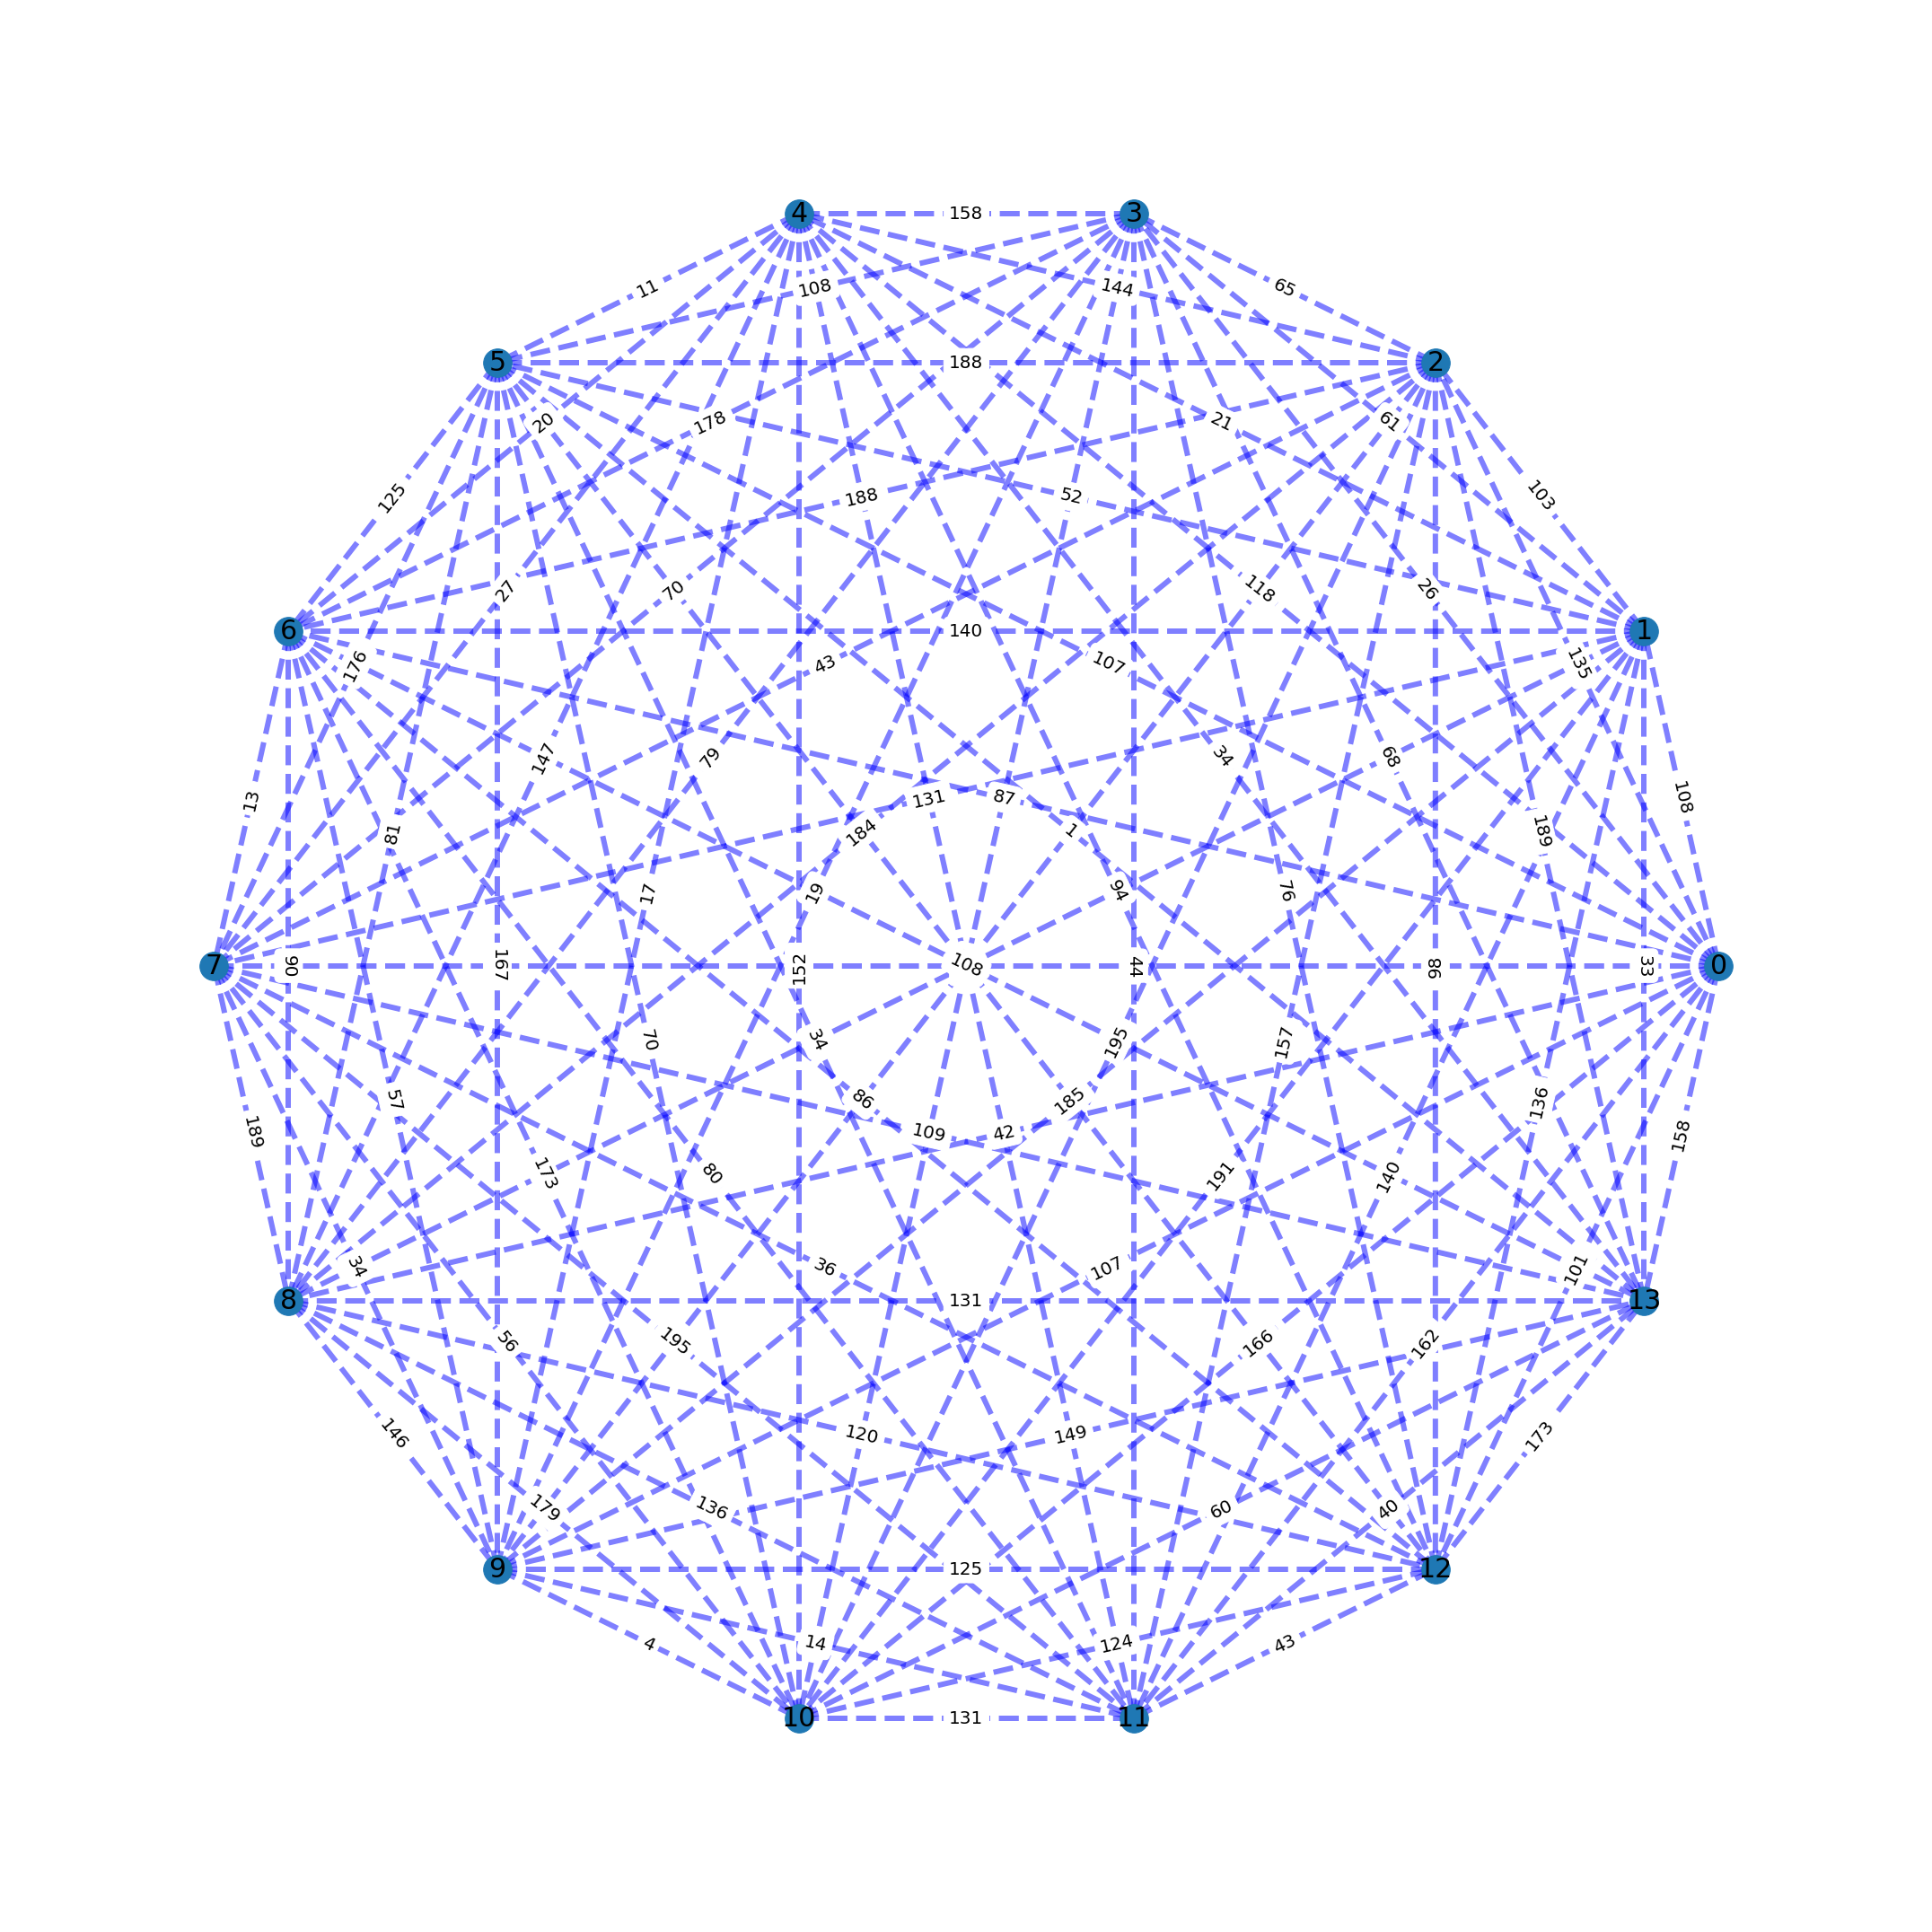

In [30]:
NUM_NODES = 14
nodes_list, edges_w = generate_network(num_nodes=NUM_NODES,rand_a=0,rand_b=200)
draw_custom_weighted_graph(node_list=nodes_list, edge_weight_list=edges_w, figsize=(30,30))

Step: 1 - Cost: 933
Step: 2 - Cost: 910
Step: 3 - Cost: 781
Step: 4 - Cost: 765
Step: 5 - Cost: 682
Step: 6 - Cost: 653
Step: 7 - Cost: 614
Step: 8 - Cost: 573
Step: 9 - Cost: 573
Step: 10 - Cost: 573
Step: 11 - Cost: 510
Step: 12 - Cost: 510
Step: 13 - Cost: 510
Step: 14 - Cost: 510
Step: 15 - Cost: 510
Step: 16 - Cost: 492
Step: 17 - Cost: 492
Step: 18 - Cost: 492
Step: 19 - Cost: 492
Step: 20 - Cost: 492


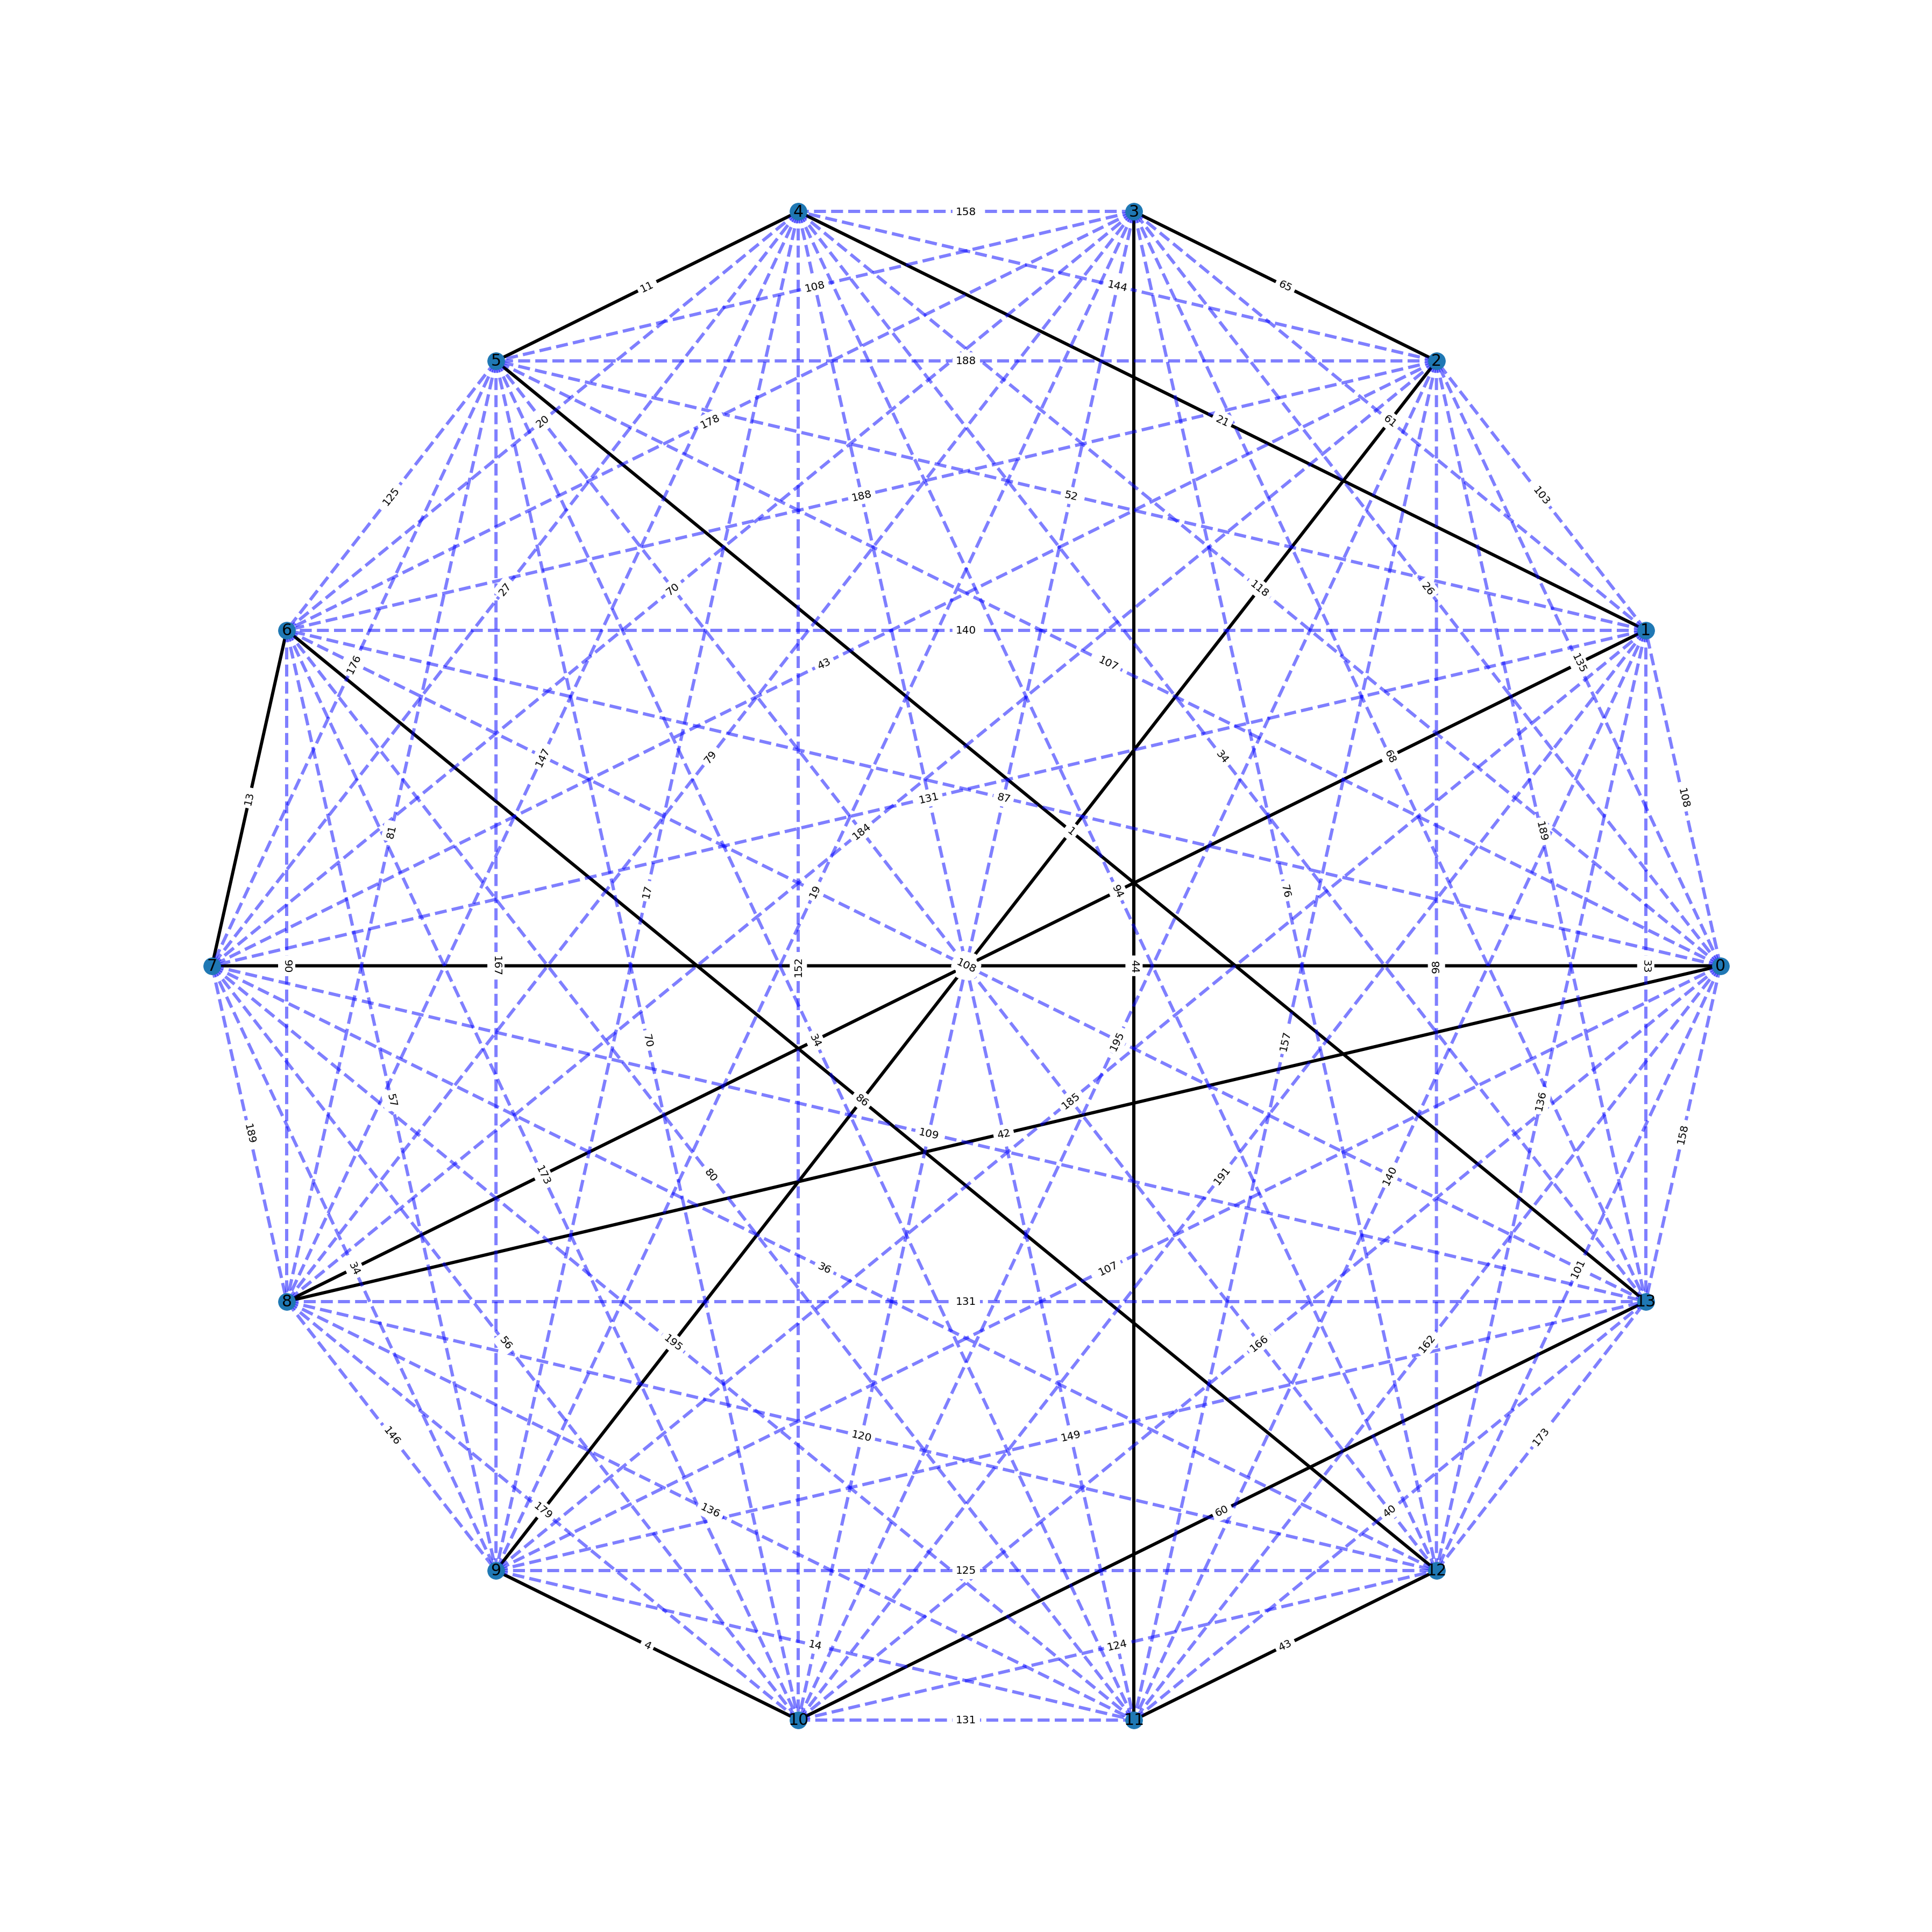

Step: 21 - Cost: 492
Step: 22 - Cost: 492
Step: 23 - Cost: 492
Step: 24 - Cost: 492
Step: 25 - Cost: 492
Condition got in the step 25 with cost: 492 and the tour is: [10, 9, 2, 3, 11, 12, 6, 7, 0, 8, 1, 4, 5, 13]


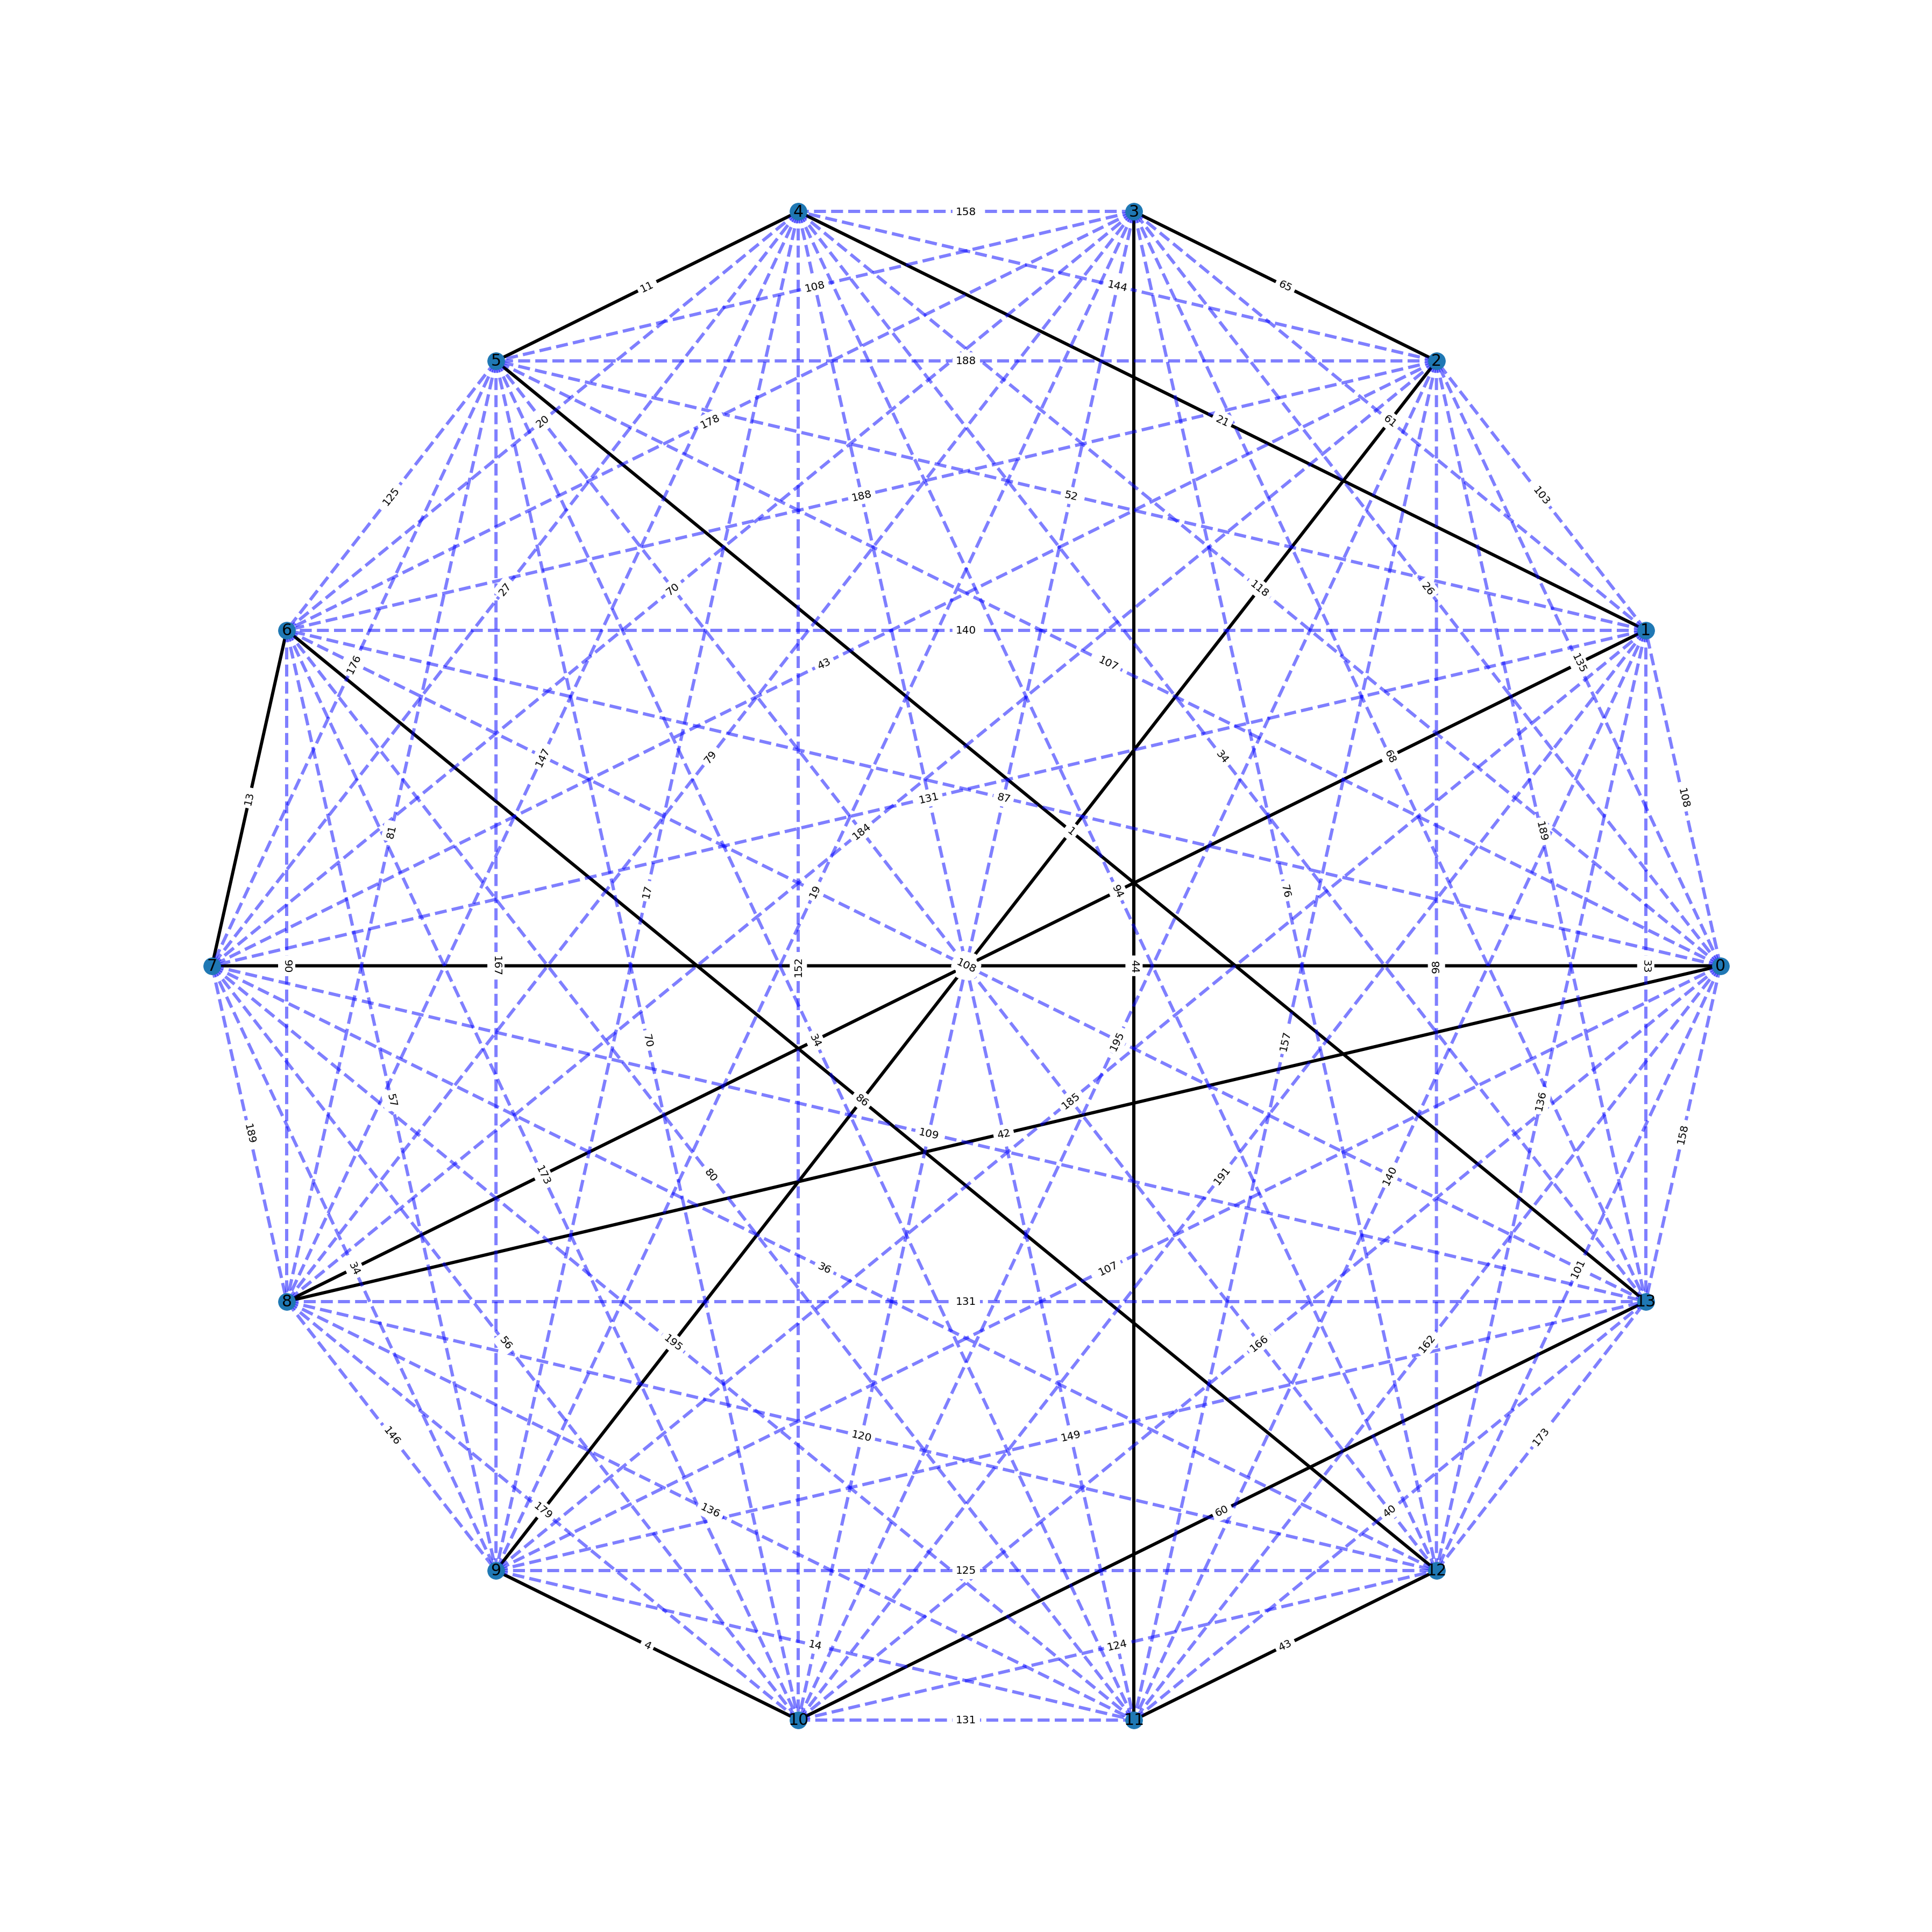

In [31]:
import datetime as dt
PRINT_RATE =20
K = 10
params = {
"population_prop":1.1, "crossover_proportion":0.8,"mutation_thd":0.3, "exploration_prob":0.2
}
ga = GA_P(nodes_list, edges_w, **params)
steps =[]
costs = []
best_tour = []
times = []
while len(costs) < K or  np.std(costs[-K:]) != 0:
    new_population, new_costs = ga.step()
    tour,cost = min(zip(new_population, new_costs), key=lambda el:el[1])
    tour_edges = ga.generate_sequential_pairs(tour)
    print(f"Step: {ga.step_number} - Cost: {cost}")
    steps.append(ga.step_number)
    costs.append(cost)
    best_tour.append(tour)
    if ga.step_number%PRINT_RATE == 0:
        draw_custom_weighted_graph(nodes_list, edges_w, tour_edges, figsize=(50,50))
    times.append(dt.datetime.now())

print(f"Condition got in the step {steps[-1]} with cost: {costs[-1]} and the tour is: {best_tour[-1]}")

draw_custom_weighted_graph(nodes_list, edges_w, tour_edges, figsize=(50,50))

# Testing 200 nodes

In [19]:
import json

In [20]:
NUM_NODES = 200
nodes_list, edges_w = generate_network(num_nodes=NUM_NODES,rand_a=0,rand_b=200)

In [ ]:
%%time

import datetime as dt
PRINT_RATE =3
params = {
"population_prop":1.1, "crossover_proportion":0.8,"mutation_thd":0.3, "exploration_prob":0.2
}
ga = TSPGA(nodes_list, edges_w, **params)
steps =[]
costs = []
best_tour = []
times = []
while len(costs) < 10 or  np.std(costs[-10:]) != 0:
    new_population, new_costs = ga.step()
    tour,cost = min(zip(new_population, new_costs), key=lambda el:el[1])
    tour_edges = ga.generate_sequential_pairs(tour)
    print(f"Step: {ga.step_number} - Cost: {cost}")
    steps.append(ga.step_number)
    costs.append(cost)
    best_tour.append(tour)
    if ga.step_number%PRINT_RATE == 0:
        #draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)
        pass
    times.append(dt.datetime.now())

print(f"Condition got in the step {steps[-1]} with cost: {costs[-1]} and the tour is: {best_tour[-1]}")

#draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)

Step: 1 - Cost: 17078
Step: 2 - Cost: 16203
Step: 3 - Cost: 15485
Step: 4 - Cost: 14756
Step: 5 - Cost: 14262
Step: 6 - Cost: 13754
Step: 7 - Cost: 13172
Step: 8 - Cost: 12775
Step: 9 - Cost: 12203
Step: 10 - Cost: 11703
Step: 11 - Cost: 11258
Step: 12 - Cost: 10809
Step: 13 - Cost: 10464
Step: 14 - Cost: 9914
Step: 15 - Cost: 9399
Step: 16 - Cost: 9014
Step: 17 - Cost: 8765
Step: 18 - Cost: 8396
Step: 19 - Cost: 7998


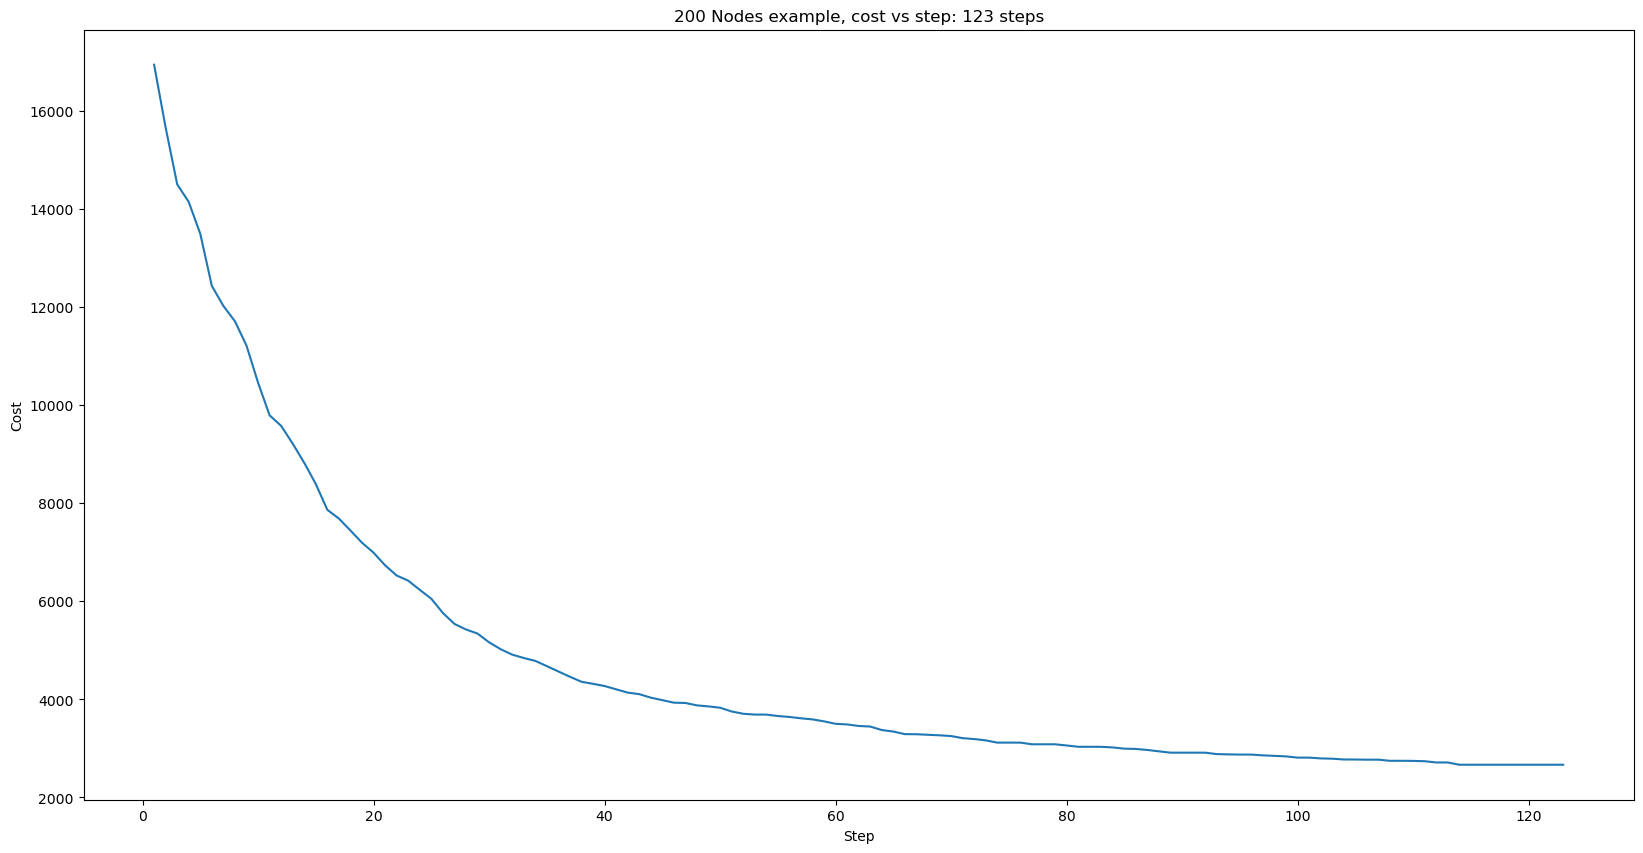

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.title(f"200 Nodes example, cost vs step: {steps[-1]} steps")
sns.lineplot(x=steps, y=costs)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.show()

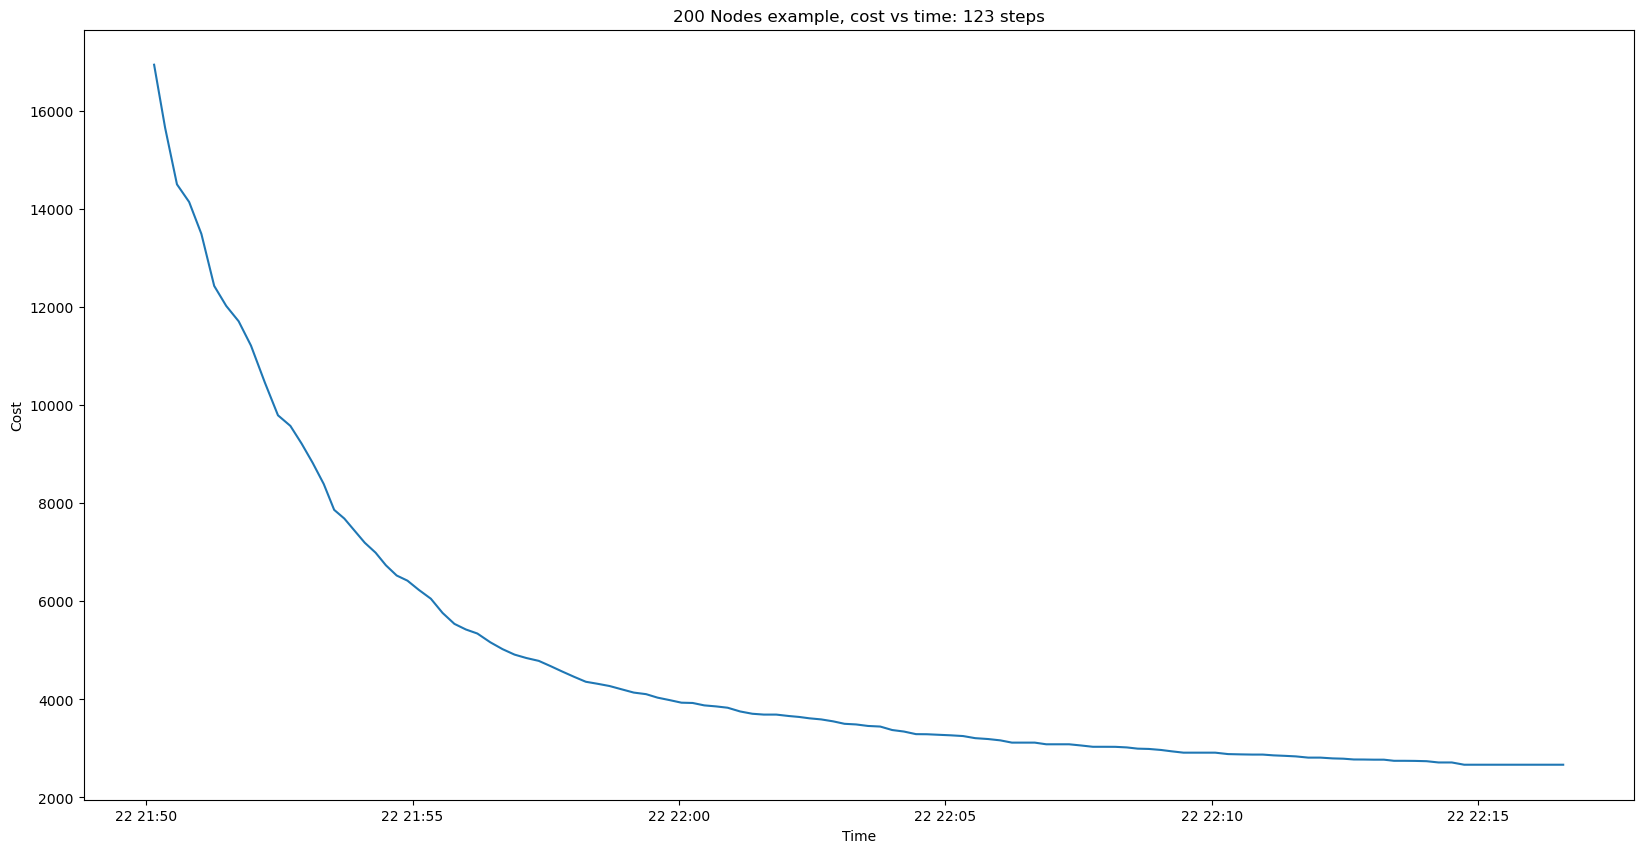

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.title(f"200 Nodes example, cost vs time: {steps[-1]} steps")
sns.lineplot(x=times, y=costs)
plt.ylabel("Cost")
plt.xlabel("Time")
plt.show()

In [19]:
GR = {"steps":steps, "costs":costs, "best_tour":best_tour}
write_dict_to_file("data/GR_200_nodes.json", GR)

# Running three of them same time

In [32]:
from branch_bound.TSP import TSPBranchBound
from ga.tsp_ga_din_crossover import TSPGA 
from ga.tsp_ga import TSPGA as TSPGAStaticCrossover

# Parameters for the GA algorithms
params = {
    "population_prop": 1.1, 
    "crossover_proportion": 0.8,
    "mutation_thd": 0.3, 
    "exploration_prob": 0.2
}

# Define the 4-node complete graph
nodes = [0, 1, 2, 3]
edges = [
    [0, 1, 10],
    [0, 2, 20],
    [0, 3, 25],
    [1, 2, 15],
    [1, 3, 35],
    [2, 3, 30]
]

# Running Branch and Bound algorithm
tsp_search = TSPBranchBound(nodes, edges)
tour1, cost1 = tsp_search.run()

# Running Genetic Algorithm with Dynamic Crossover (GA-P)
ga = TSPGA(nodes, edges, **params)
tour2, cost2 = ga.run()

# Running Genetic Algorithm with Static Crossover (GA-N)
ga_static = TSPGAStaticCrossover(nodes, edges, **params)
tour3, cost3 = ga_static.run()

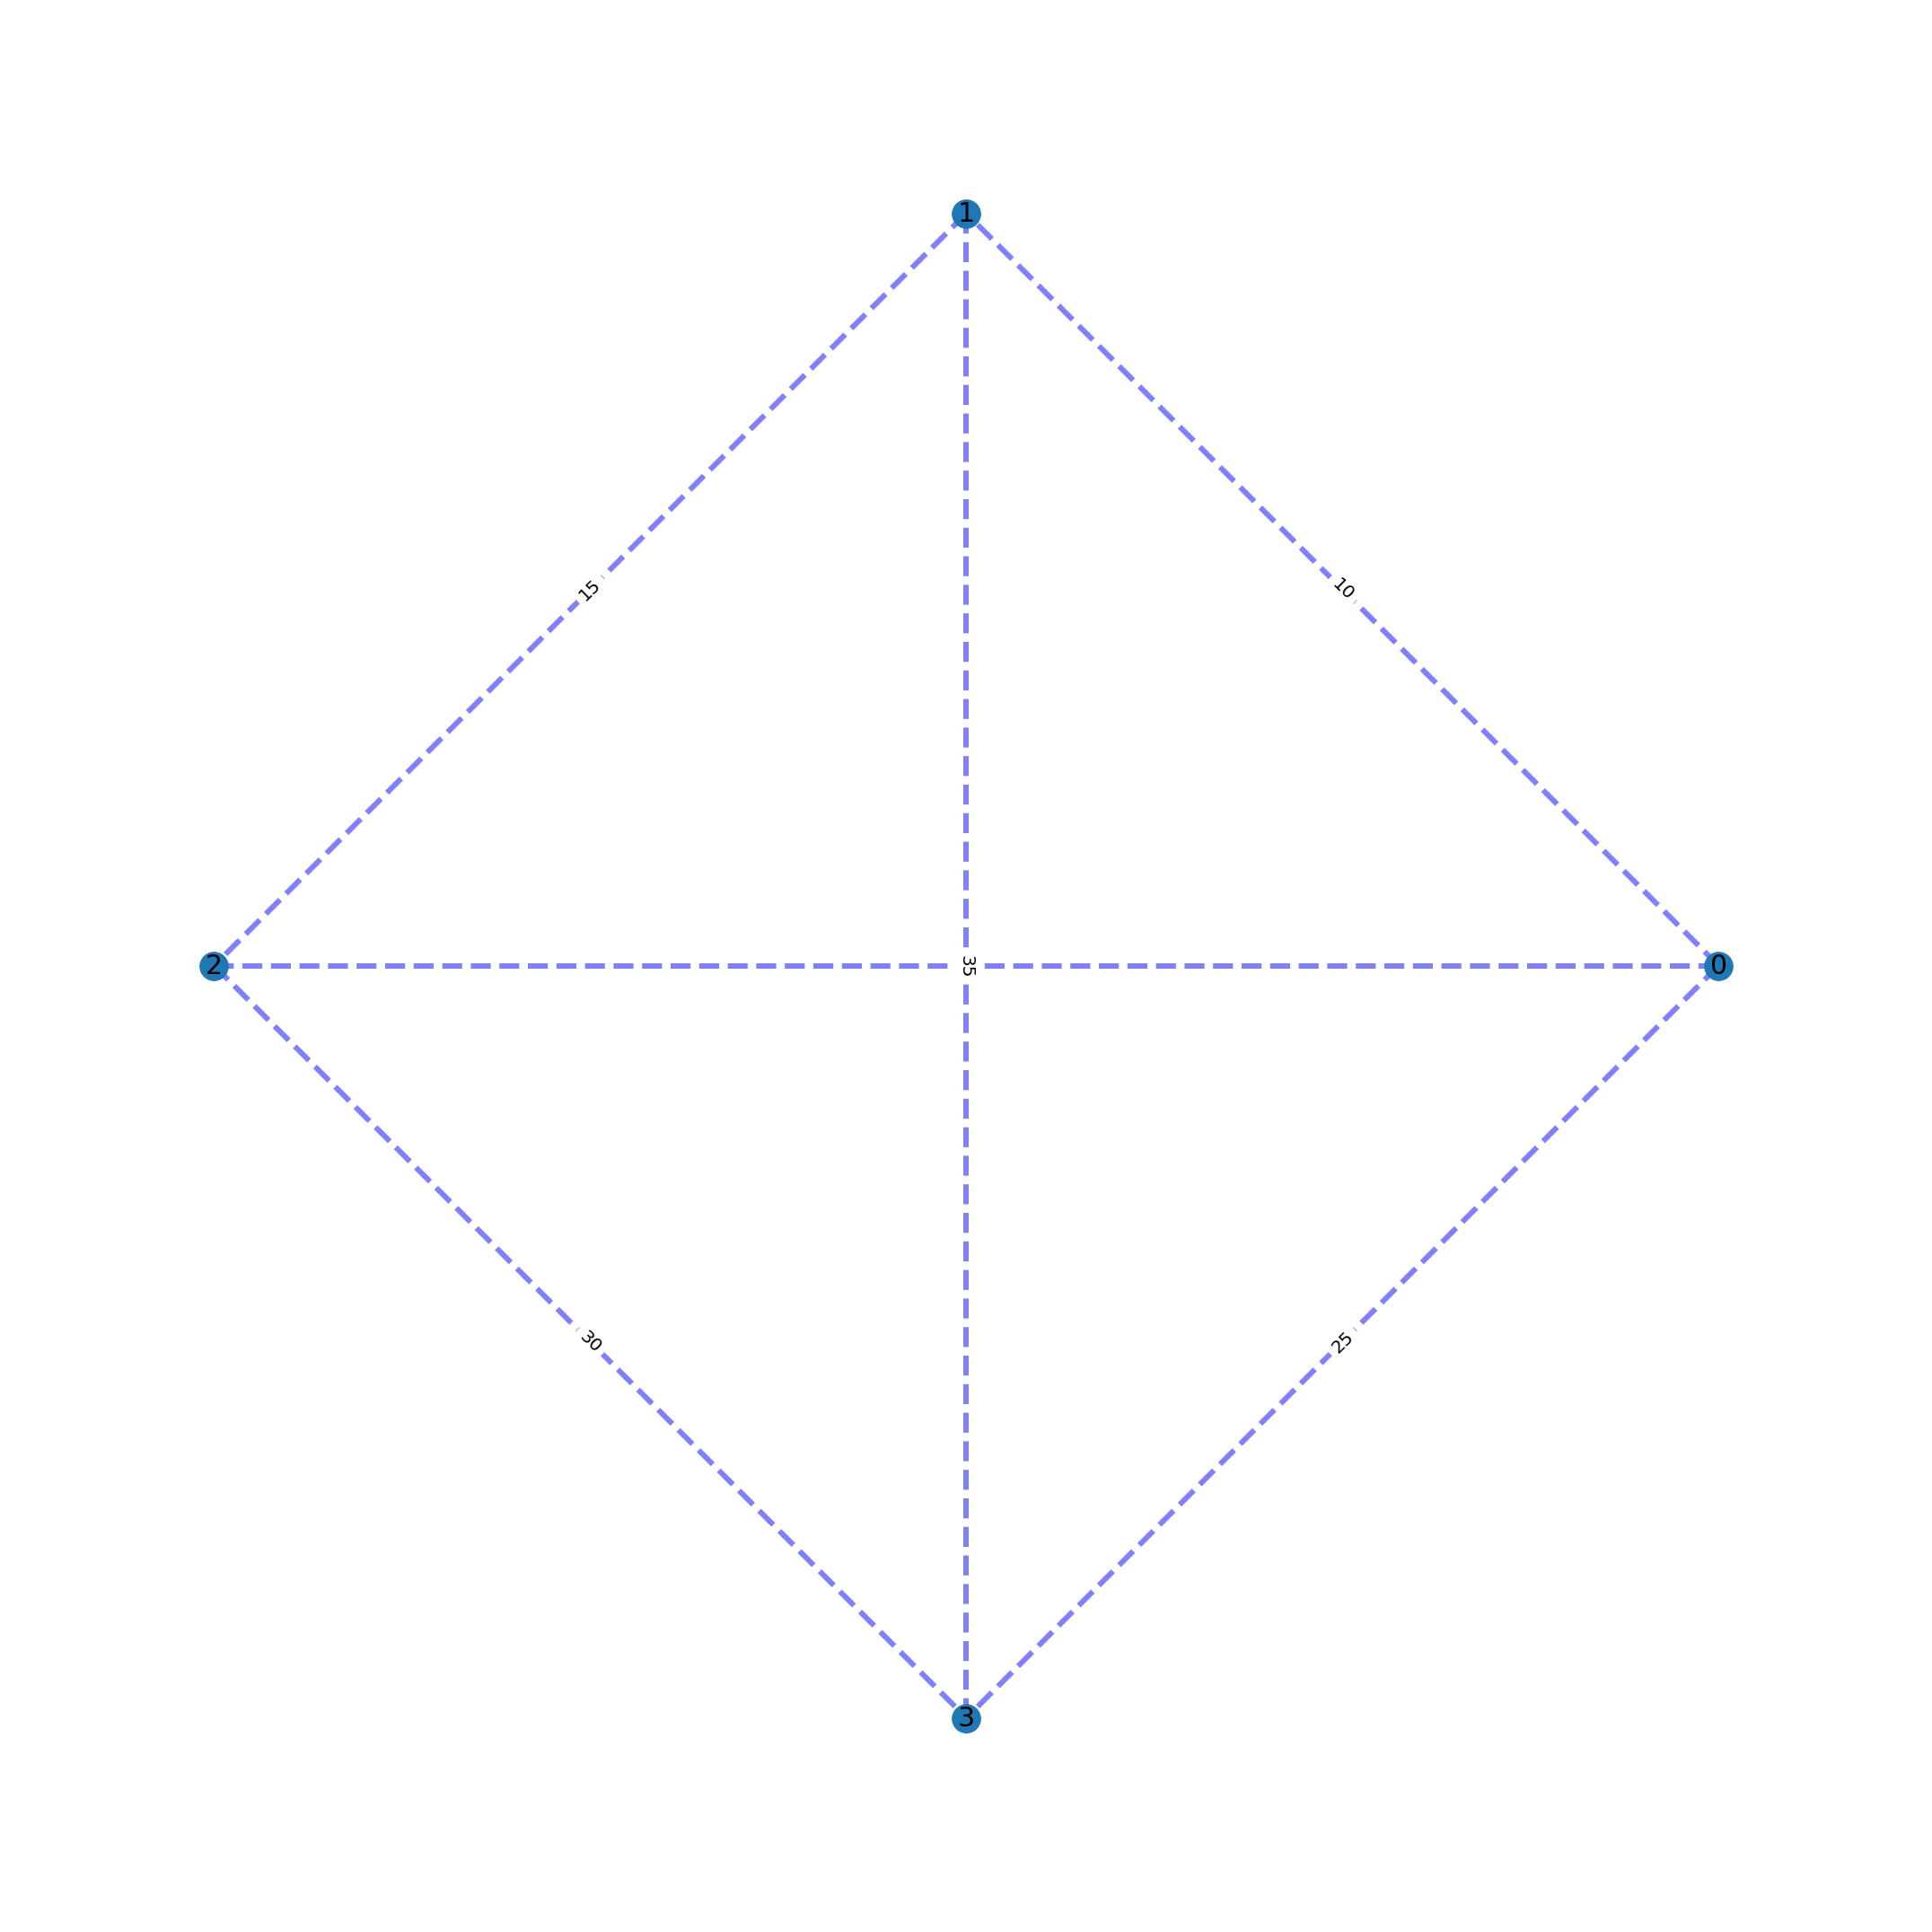

In [37]:
draw_custom_weighted_graph(nodes, edges)